**Mammographic Masses project_Decision Tree and Random Forests** <br>

BI-RADS assessment: 1 to 5 (ordinal, non-predictive!)<br>
Age: patient's age in years (integer)<br>
Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)<br>
Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)<br>
Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)<br>
Severity: benign=0 or malignant=1 -- we named it as Target in the cleaned version of the data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("mammographic_masses_data_clean.csv")
df.head()

,BI-RADS,Age,Shape,Margin,Density,Target
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 6 columns):
BI-RADS    830 non-null int64
Age        830 non-null int64
Shape      830 non-null int64
Margin     830 non-null int64
Density    830 non-null int64
Target     830 non-null int64
dtypes: int64(6)
memory usage: 39.0 KB


In [4]:
df.describe()

,BI-RADS,Age,Shape,Margin,Density,Target
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [5]:
df["Target"].value_counts()

0    427
1    403
Name: Target, dtype: int64

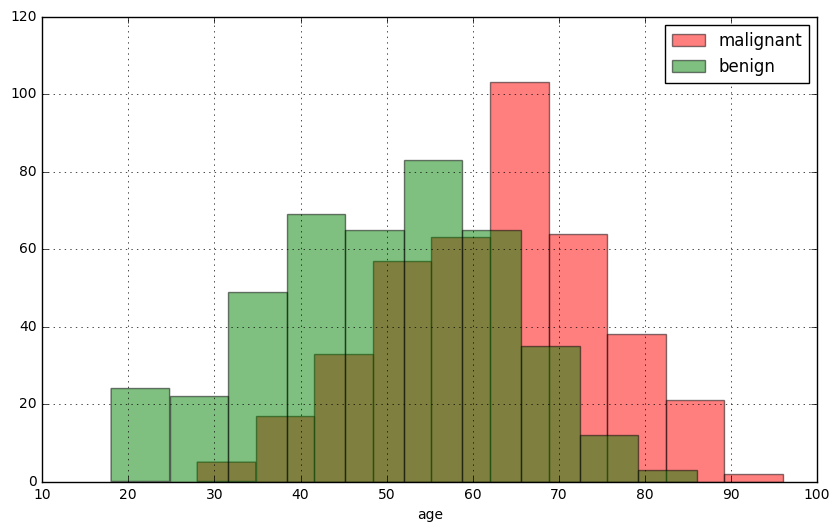

In [9]:
plt.figure(figsize=(10,6))
df[df["Target"]==1]["Age"].hist(alpha=0.5,label="malignant",color="red")
df[df["Target"]==0]["Age"].hist(alpha=0.5,label="benign",color="green")
plt.xlabel("age")
plt.legend()

**It makes sense that when you are before age 60, the test result tends to be benign**

In [10]:
X = df.drop('Target',axis=1)
y = df['Target']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [14]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
predictions = dtree.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       133
           1       0.73      0.65      0.68       116

   micro avg       0.72      0.72      0.72       249
   macro avg       0.72      0.72      0.72       249
weighted avg       0.72      0.72      0.72       249

[[105  28]
 [ 41  75]]


In [18]:
#Import Random Forest Classifier and create its instance with 200 nodes of trees
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
rfc_predictions = rfc.predict(X_test)

In [20]:
# Evaluation
print(classification_report(y_test,rfc_predictions))
print(confusion_matrix(y_test,rfc_predictions))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       133
           1       0.80      0.76      0.78       116

   micro avg       0.80      0.80      0.80       249
   macro avg       0.80      0.80      0.80       249
weighted avg       0.80      0.80      0.80       249

[[111  22]
 [ 28  88]]


**clearly the random forest is doing a better job than decision trees!**